## **ASSIGNMENT 4 - MALL CUSTOMERS DATASET**

Downloaded dataset from kaggle

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Loading the dataset

In [4]:
data=pd.read_csv("Mall_Customers.csv")
data.head()

,CustomerID,Gender,Age,Annual_Income (k$),Spending Score_(1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Univariate Analysis

In [5]:
df = pd.DataFrame(data)

In [6]:
df.columns = df.columns.str.replace(' ', '_')

In [7]:
print("\n\n", df)



      CustomerID  Gender  Age  Annual_Income_(k$)  Spending_Score_(1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]


# Countplot

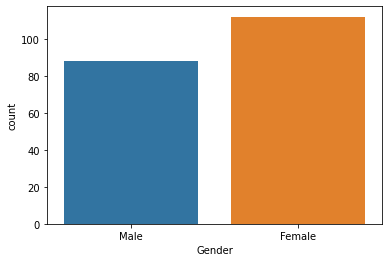

In [8]:
sns.countplot(x="Gender",data=data)

# Stripplot

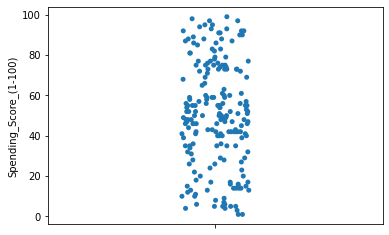

In [9]:
sns.stripplot (y=df['Spending_Score_(1-100)'])

# Boxplot

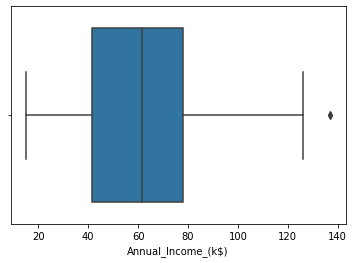

In [10]:
sns.boxplot(x =data['Annual_Income_(k$)'])

# Bi-Variate Analysis

# Relational plot

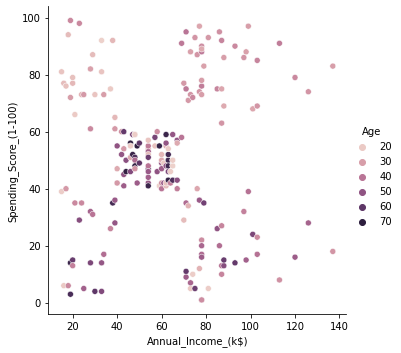

In [11]:
sns.relplot(x='Annual_Income_(k$)',y='Spending_Score_(1-100)',hue='Age',data=data)

# Boxplot

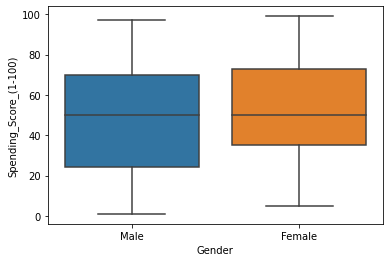

In [12]:
sns.boxplot(x='Gender',y='Spending_Score_(1-100)',data=data)

# Barplot

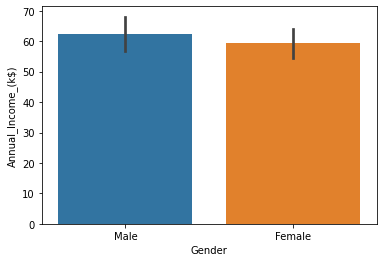

In [13]:
sns.barplot(x='Gender',y='Annual_Income_(k$)',data=data)

# Stripplot

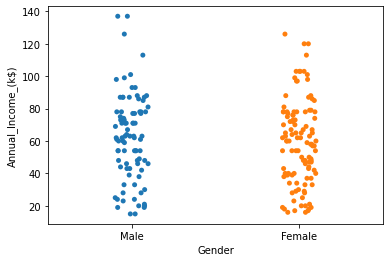

In [14]:
sns.stripplot(x="Gender", y="Annual_Income_(k$)", data=data)

# Multi-Variate Analysis

# Pairplot

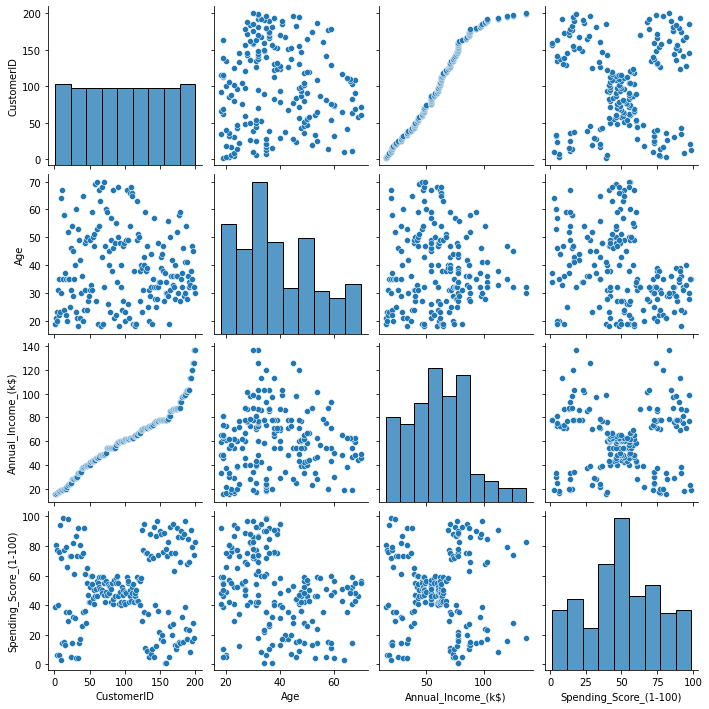

In [15]:
sns.pairplot(data)

# Perform descriptive statistics on the dataset

In [16]:
data.describe()

,CustomerID,Age,Annual_Income_(k$),Spending_Score_(1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


# Check for Missing values and deal with them

In [17]:
data.isnull().any()

CustomerID                False
Gender                    False
Age                       False
Annual_Income_(k$)        False
Spending_Score_(1-100)    False
dtype: bool

In [18]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual_Income_(k$)        0
Spending_Score_(1-100)    0
dtype: int64

# Find the outliers and replace them outliers

In [19]:
outliers=data.quantile(q=(0.25,0.75))
outliers

,CustomerID,Age,Annual_Income_(k$),Spending_Score_(1-100)
0.25,50.75,28.75,41.5,34.75
0.75,150.25,49.00,78.0,73.00


In [20]:
Q1 = df['Annual_Income_(k$)'].quantile(0.25)
Q3 = df['Annual_Income_(k$)'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_limit = Q1 - 1.5 * IQR
data.median(numeric_only=True)

CustomerID                100.5
Age                        36.0
Annual_Income_(k$)         61.5
Spending_Score_(1-100)     50.0
dtype: float64

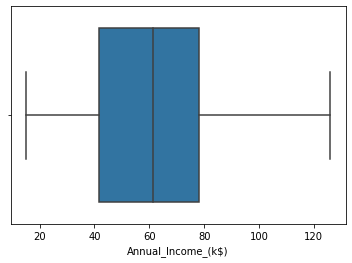

In [21]:
data['Annual_Income_(k$)'] = np.where(data['Annual_Income_(k$)'] < lower_limit, 7, data['Annual_Income_(k$)'])
sns.boxplot(x =data['Annual_Income_(k$)'],showfliers = False)

# Check for Categorical columns and perform encoding

In [22]:
from sklearn.preprocessing import LabelEncoder

lab = LabelEncoder()
data.Gender = lab.fit_transform(data.Gender)

data.head()

,CustomerID,Gender,Age,Annual_Income_(k$),Spending_Score_(1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


# Scaling the data

The standardization method uses this formula:
z = (x - u) / s
Where z is the new value, x is the original value, u is the mean and s is the standard deviation.

In [23]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

X = df[['Annual_Income_(k$)','Spending_Score_(1-100)']]
df[['Annual_Income_(k$)','Spending_Score_(1-100)']]=scale.fit_transform(X)
df[['Annual_Income_(k$)','Spending_Score_(1-100)']]

,Annual_Income_(k$),Spending_Score_(1-100)
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980
...,...,...
195,2.268791,1.118061
196,2.497807,-0.861839
197,2.497807,0.923953
198,2.917671,-1.250054


In [24]:
df

,CustomerID,Gender,Age,Annual_Income_(k$),Spending_Score_(1-100)
0,1,1,19,-1.738999,-0.434801
1,2,1,21,-1.738999,1.195704
2,3,0,20,-1.700830,-1.715913
3,4,0,23,-1.700830,1.040418
4,5,0,31,-1.662660,-0.395980
...,...,...,...,...,...
195,196,0,35,2.268791,1.118061
196,197,0,45,2.497807,-0.861839
197,198,1,32,2.497807,0.923953
198,199,1,32,2.917671,-1.250054


# Perform any of the clustering algorithms :
## K -means clustering algorithm

# Identifying the optimum number of clusters

Elbow method is used to find the optimum number of clusters.

The Elbow plot allows us to plot the inertia which is the measure of how well he data is was clustered by the k means algorithm against the number of clusters.

We are looking for the point where the inertia begins to slow.

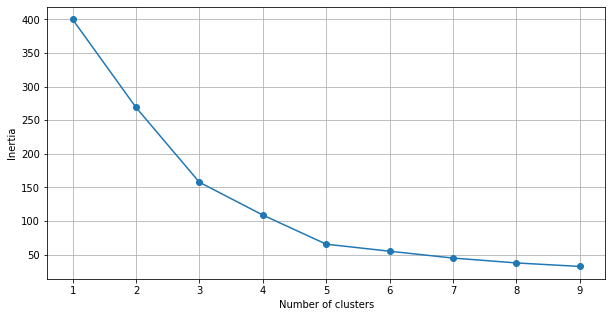

In [25]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.cluster import KMeans

data=df
def optimise_k_means(data,max_k):
    means=[]
    inertias=[]
    
    for k in range(1,max_k):
        kmeans=KMeans(n_clusters=k)
        kmeans.fit(data)
        
        means.append(k)
        inertias.append(kmeans.inertia_)
    
    fig=plt.subplots(figsize=(10.,5))
    plt.plot(means,inertias,'o-')
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.grid(True)
    plt.show()
    
optimise_k_means(data[['Annual_Income_(k$)','Spending_Score_(1-100)']],10)

From the above plot, we can see that there is a big change in inertia(The sum of the squared distances to the nearest cluster center) and slop from cluster 5 onwards.

Therefore, the number of cluster is chosen to be 5. 

# Applying K means clustering - Model building

In [26]:
kmeans=KMeans(n_clusters=5,init='k-means++',random_state=0)
kmeans.fit_predict(df[['Annual_Income_(k$)','Spending_Score_(1-100)']])
df['kmeans_5']=kmeans.labels_
df

,CustomerID,Gender,Age,Annual_Income_(k$),Spending_Score_(1-100),kmeans_5
0,1,1,19,-1.738999,-0.434801,4
1,2,1,21,-1.738999,1.195704,3
2,3,0,20,-1.700830,-1.715913,4
3,4,0,23,-1.700830,1.040418,3
4,5,0,31,-1.662660,-0.395980,4
...,...,...,...,...,...,...
195,196,0,35,2.268791,1.118061,2
196,197,0,45,2.497807,-0.861839,0
197,198,1,32,2.497807,0.923953,2
198,199,1,32,2.917671,-1.250054,0


# Plotting the results

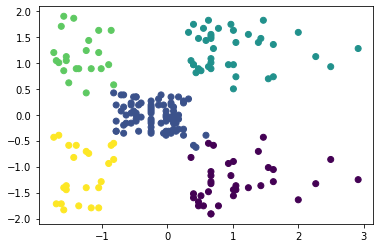

In [27]:
plt.scatter(x=df['Annual_Income_(k$)'],y=df['Spending_Score_(1-100)'],c=df['kmeans_5'])

Now the result data is also added to our dataframe

In [28]:
kmeans.labels_

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int32)

In [29]:
kmeans.cluster_centers_

array([[ 1.05500302, -1.28443907],
       [-0.20091257, -0.02645617],
       [ 0.99158305,  1.23950275],
       [-1.32954532,  1.13217788],
       [-1.30751869, -1.13696536]])

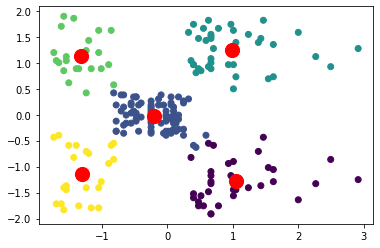

In [30]:
clusters=kmeans.cluster_centers_

plt.scatter(x=df['Annual_Income_(k$)'],y=df['Spending_Score_(1-100)'],c=df['kmeans_5'])
plt.scatter(clusters[0][0],clusters[0][1],marker='o',s=200,color='red')
plt.scatter(clusters[1][0],clusters[1][1],marker='o',s=200,color='red')
plt.scatter(clusters[2][0],clusters[2][1],marker='o',s=200,color='red')
plt.scatter(clusters[3][0],clusters[3][1],marker='o',s=200,color='red')
plt.scatter(clusters[4][0],clusters[4][1],marker='o',s=200,color='red')

# Testing our model

In [31]:
independent = data.iloc[:,3:-1].values
dependent = data.iloc[:,5:].values

In [32]:
independent.shape

(200, 2)

In [33]:
dependent.shape

(200, 1)

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(independent, dependent, random_state=0, train_size = .2)

In [35]:
X_test

array([[-1.43364376, -0.82301709],
       [ 1.00919971, -1.44416206],
       [ 0.09313341, -0.16305055],
       [ 0.01679455, -0.3183368 ],
       [ 1.04736914,  0.72984534],
       [ 1.42906343, -1.36651894],
       [-1.66266033,  1.00159627],
       [ 0.62750542, -0.55126616],
       [-1.54815205, -1.36651894],
       [ 0.66567484, -1.17241113],
       [-0.55574689,  0.18634349],
       [ 0.36031941,  1.04041783],
       [ 1.390894  , -0.7065524 ],
       [ 0.66567484, -1.32769738],
       [-0.25039146,  0.03105725],
       [-1.62449091,  1.70038436],
       [-1.05194947,  1.62274124],
       [ 0.39848884, -1.5994483 ],
       [-1.01378004,  0.88513158],
       [-0.25039146, -0.12422899],
       [ 1.42906343,  1.46745499],
       [ 0.62750542,  1.81684904],
       [-0.82293289,  0.5745591 ],
       [ 0.66567484,  0.88513158],
       [-0.55574689,  0.22516505],
       [ 0.32214998,  1.58391968],
       [ 1.23821628,  1.54509812],
       [ 1.46723286,  1.81684904],
       [ 0.32214998,

In [36]:
kmeans.predict(X_test)

array([4, 0, 1, 1, 2, 0, 3, 0, 4, 0, 1, 2, 0, 0, 1, 3, 3, 0, 3, 1, 2, 2,
       3, 2, 1, 2, 2, 2, 1, 4, 4, 1, 0, 1, 4, 2, 2, 4, 1, 1, 0, 1, 4, 1,
       0, 1, 4, 1, 1, 2, 1, 0, 0, 1, 2, 4, 4, 0, 4, 1, 2, 1, 2, 3, 2, 1,
       1, 2, 1, 1, 2, 1, 2, 1, 0, 1, 1, 4, 3, 2, 2, 1, 0, 2, 1, 1, 4, 1,
       0, 2, 1, 4, 0, 1, 0, 0, 2, 1, 1, 1, 0, 2, 1, 4, 1, 1, 1, 1, 2, 3,
       1, 1, 1, 1, 3, 2, 3, 0, 2, 4, 3, 1, 1, 1, 1, 1, 3, 1, 0, 0, 4, 1,
       1, 1, 2, 2, 0, 1, 2, 3, 1, 1, 3, 1, 1, 3, 1, 0, 4, 1, 1, 2, 3, 4,
       2, 1, 2, 0, 4, 4], dtype=int32)

# Measuring performance

Root Mean Square Error is the square root of the average of the squared differences between the estimated and the actual value of the variable

In [37]:
predicted=kmeans.predict(X_test)
expected = y_test

In [38]:
from sklearn.metrics import mean_squared_error
import math

MSE = mean_squared_error(expected, predicted)
 
RMSE = math.sqrt(MSE)
print("Root Mean Square Error : ",RMSE)

Root Mean Square Error :  0.0


It returns a non-negative floating point value (the best value is 0.0) or an array of floating point values